# solution 1

In [30]:
# Basic information of alarms
# viz the graph

# Try TTPM Method
# Try notears
# Try another method in book



In [31]:
# S_1_2 notears

In [85]:
import os
import numpy as np
import pandas as pd

import os
from castle.common.priori_knowledge import PrioriKnowledge
# os.path.abspath('.')

In [33]:
import plotly.express as px
import plotly.graph_objects as go


# Read Data

In [207]:
dataset = 'dataset_1'

# alarm data
alarms = pd.read_csv(r'./datasets/dataset_1/alarm.csv')
# causal_prior
causal_prior= np.load(r'./datasets/dataset_1/causal_prior.npy')

# topology
topology = np.load(r'./datasets/dataset_1/topology.npy')

# rca
rca_prior = pd.read_csv(r'./datasets/dataset_1/rca_prior.csv')

print(f"shape of alarm data: {alarms.shape}")
print(f"shape of causal prior matrix: {causal_prior.shape}")
print(f"shape of topology prior matrix: {topology.shape}")
print(f"shape of rca prior matrix: {rca_prior.shape}")
# Notes: topology.npy and rca_prior.csv are not used in this script.

shape of alarm data: (141853, 4)
shape of causal prior matrix: (39, 39)
shape of topology prior matrix: (35, 35)
shape of rca prior matrix: (49, 2)


In [244]:
dataset = 'dataset_3'

# alarm data
alarms = pd.read_csv(r'./datasets/{}/alarm.csv'.format(dataset))
# causal_prior
causal_prior= np.load(r'./datasets/{}/causal_prior.npy'.format(dataset))

# topology
topology = np.load(r'./datasets/{}/topology.npy'.format(dataset))

# rca
rca_prior = pd.read_csv(r'./datasets/{}/rca_prior.csv'.format(dataset))

print(f"shape of alarm data: {alarms.shape}")
print(f"shape of causal prior matrix: {causal_prior.shape}")
print(f"shape of topology prior matrix: {topology.shape}")
print(f"shape of rca prior matrix: {rca_prior.shape}")
# Notes: topology.npy and rca_prior.csv are not used in this script.

shape of alarm data: (198962, 4)
shape of causal prior matrix: (31, 31)
shape of topology prior matrix: (39, 39)
shape of rca prior matrix: (43, 2)


In [206]:
dataset = 'dataset_4'

# alarm data
alarms = pd.read_csv(r'./datasets/{}/alarm.csv'.format(dataset))
# causal_prior
causal_prior= np.load(r'./datasets/{}/causal_prior.npy'.format(dataset))

# # topology
# topology = np.load(r'./datasets/{}/topology.npy'.format(dataset))

# # rca
# rca_prior = pd.read_csv(r'./datasets/{}/rca_prior.csv'.format(dataset))

print(f"shape of alarm data: {alarms.shape}")
print(f"shape of causal prior matrix: {causal_prior.shape}")
# print(f"shape of topology prior matrix: {topology.shape}")
# print(f"shape of rca prior matrix: {rca_prior.shape}")
# Notes: topology.npy and rca_prior.csv are not used in this script.

shape of alarm data: (126803, 4)
shape of causal prior matrix: (30, 30)


In [279]:
prior_knowledge = PrioriKnowledge(causal_prior.shape[0])
for i, j in zip(*np.where(causal_prior == 1)):
    prior_knowledge.add_required_edge(i, j)

for i, j in zip(*np.where(causal_prior == 0)):
    prior_knowledge.add_forbidden_edge(i, j)

# EDA and Preprocessing

In [121]:
# How is the alarm data organized?
# How does it looks like

In [208]:
alarms.head()

alarm_id  device_id  start_timestamp  end_timestamp
0        12         25                5             38
1        10         25                7             45
2         2         24               13             53
3        35         17               13             86
4        35         32               13             14

In [245]:
# turn alarm_id and device_id into categorical data
alarms['alarm_id'] = alarms['alarm_id'].astype('category')
alarms['device_id'] = alarms['device_id'].astype('category')

In [246]:
alarms.shape

(198962, 4)

In [247]:
# is the alarm random?

alarms.groupby('alarm_id').count()

device_id  start_timestamp  end_timestamp
alarm_id                                           
0             16980            16980          16980
1              1943             1943           1943
2               777              777            777
3              5501             5501           5501
4               184              184            184
5               578              578            578
6              7969             7969           7969
7             15012            15012          15012
8             13211            13211          13211
9               789              789            789
10             5659             5659           5659
11              208              208            208
12              541              541            541
13            32455            32455          32455
14              331              331            331
15             1539             1539           1539
16             2668             2668           2668
17            28585            28585          28585
18             4202             4202           4202
19             6478             6478           6478
20             4936             4936           4936
21             2313             2313           2313
22             1823             1823           1823
23             4878             4878           4878
24              109              109            109
25             1892             1892           1892
26            20289            20289          20289
27             6919             6919           6919
28             8562             8562           8562
29              310              310            310
30             1321             1321           1321

In [248]:
# random select
alarms_sample = alarms.sample(n=10000, random_state=1)

# view of device_id
px.scatter(alarms_sample, y='device_id', x='start_timestamp', color='device_id')

In [249]:
# view of alarm_id
px.scatter(alarms_sample, y='alarm_id', x='start_timestamp', color='alarm_id')

In [250]:
# view together

px.scatter(alarms_sample, y='device_id', x='start_timestamp', color='alarm_id')

In [251]:
## count of device and alarm
alarms.groupby('device_id').count()

alarm_id  start_timestamp  end_timestamp
device_id                                          
0              2040             2040           2040
1              2764             2764           2764
2              2395             2395           2395
3             11081            11081          11081
4              1131             1131           1131
5             13054            13054          13054
6             15649            15649          15649
7             10250            10250          10250
8               594              594            594
9              2788             2788           2788
10             2407             2407           2407
11             1350             1350           1350
12             1780             1780           1780
13             6148             6148           6148
14             3137             3137           3137
15             1063             1063           1063
16            10791            10791          10791
17              919              919            919
18             9176             9176           9176
19             1217             1217           1217
20             1956             1956           1956
21             2181             2181           2181
22             2406             2406           2406
23            12197            12197          12197
24             1703             1703           1703
25             1412             1412           1412
26             3618             3618           3618
27             6994             6994           6994
28             3711             3711           3711
29             1742             1742           1742
30             6646             6646           6646
31             7410             7410           7410
32             9026             9026           9026
33            11222            11222          11222
34             7544             7544           7544
35            10461            10461          10461
36             1354             1354           1354
37              421              421            421
38             7224             7224           7224

# Show prior matrix

In [252]:
causal_prior.shape,rca_prior.shape,topology.shape

((31, 31), (43, 2), (39, 39))

In [253]:
causal_prior

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  0.,
        -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  0.,
        -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  0.,
        -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  0.,
        -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
        -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1.,

In [254]:
topology

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [255]:
rca_prior

simplified_snapshot  simplified_root_cause
0   (0, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 16, 1...                     14
1   (0, 1, 2, 5, 6, 9, 10, 12, 13, 16, 17, 20, 23,...                      1
2   (0, 2, 3, 5, 6, 7, 10, 11, 13, 14, 15, 16, 18,...                     14
3   (0, 1, 2, 3, 5, 6, 7, 9, 10, 12, 13, 14, 15, 1...                     14
4   (0, 1, 2, 3, 5, 6, 7, 8, 10, 12, 13, 14, 16, 1...                     14
5   (1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 16, ...                     14
6                                 (5, 10, 23, 27, 30)                     30
7   (0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 1...                     12
8   (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...                      4
9   (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15...                     14
10  (0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 16, 17, 1...                      9
11  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...                      4
12  (1, 3, 4, 5, 6, 7, 9, 10, 12, 13, 14, 15, 16, ...                     14
13  (0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...                      4
14  (0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 16, 1...                      9
15  (0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 1...                      4
16  (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...                     14
17  (0, 1, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, ...                     12
18  (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...                     14
19  (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13, 14, 16...                      4
20  (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...                      4
21  (0, 1, 2, 3, 5, 6, 7, 8, 12, 13, 14, 16, 18, 1...                     14
22  (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...                      4
23  (0, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13, 14, 16, 1...                     14
24  (1, 2, 3, 5, 6, 7, 9, 10, 12, 13, 16, 18, 20, ...                     12
25  (2, 3, 5, 6, 7, 10, 11, 13, 14, 15, 16, 18, 21...                     14
26  (0, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13, 14, 16, 1...                     14
27  (1, 2, 5, 6, 7, 8, 11, 13, 15, 16, 17, 18, 20,...                     29
28  (2, 3, 5, 6, 7, 10, 11, 13, 15, 16, 18, 21, 22...                     22
29  (0, 1, 2, 3, 5, 6, 7, 8, 11, 12, 13, 14, 16, 1...                     14
30  (1, 2, 3, 5, 6, 7, 9, 11, 12, 13, 14, 15, 16, ...                     14
31  (1, 2, 3, 5, 6, 7, 10, 13, 14, 16, 17, 18, 20,...                     14
32  (0, 2, 3, 5, 6, 7, 10, 11, 14, 15, 16, 18, 21,...                     14
33  (2, 3, 5, 6, 7, 8, 13, 14, 16, 18, 21, 23, 26,...                      2
34  (0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 1...                     14
35  (1, 2, 3, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, ...                     14
36  (1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, ...                     12
37  (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...                     14
38  (0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 16, 1...                     14
39  (0, 2, 3, 5, 6, 7, 11, 13, 14, 16, 18, 19, 21,...                      2
40  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...                      4
41  (0, 2, 3, 6, 7, 9, 11, 16, 18, 22, 23, 26, 27,...                     11
42  (0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 14, 15...                      4

In [256]:
# !pip install pyvis

In [257]:
import matplotlib.pyplot as plt

In [258]:
import networkx as nx
from castle.metrics import MetricsDAG
from castle.common import GraphDAG

In [259]:
COLORS = [
    '#00B0F0',
    '#FF0000',
    '#B0F000'
]

In [260]:
# too many nodes, not readable
g = nx.DiGraph(causal_prior)

# plt.figure(figsize=(12, 8))
# nx.draw(
#     G=g,
#     node_color=COLORS[0],
#     node_size=1200,
#     arrowsize=17,
#     with_labels=True,
#     font_color='white',
#     font_size=21,
#     pos=nx.circular_layout(g)
# )

In [261]:
# GraphDAG(
#     est_dag=causal_prior, 
#     true_dag=topology
#     )

# plt.show()

In [262]:

# from pyvis.network import Network

# prior_net = Network("500px", "900px", notebook=True, directed=True, layout=False)

# prior_g = nx.from_numpy_matrix(causal_prior, create_using=nx.DiGraph)

# prior_net.from_nx(prior_g)
# prior_net.show()

# # est_net.from_nx(prior_g)
# # est_net.show()

# # est_net.show("../output/draw_graphs/est_graph.html")

In [263]:


# GraphDAG(est_causal_matrix, dag_matrix)
# g_score = MetricsDAG(est_causal_matrix, dag_matrix).metrics['gscore']
# print(f"g-score: {g_score}")

In [265]:
alarms

alarm_id device_id  start_timestamp  end_timestamp
0             0         7               14             85
1             6        30               17            100
2            25         3               18             54
3            13         3               19             64
4            26        31               19             62
...         ...       ...              ...            ...
198957       13        23           604849         604889
198958       13        23           604850         604892
198959       13        27           604853         604898
198960       13        27           604896         604937
198961       13        27           604898         604934

[198962 rows x 4 columns]

# 预处理x

In [266]:
x = alarms.iloc[:,0:3]
# x.colunms = ['alarm_id','device_id','start_timestamp','end_timestamp']
x.columns = ['event','node','timestamp']
x = x.reindex(columns=['event','timestamp','node'])
x

event  timestamp node
0          0         14    7
1          6         17   30
2         25         18    3
3         13         19    3
4         26         19   31
...      ...        ...  ...
198957    13     604849   23
198958    13     604850   23
198959    13     604853   27
198960    13     604896   27
198961    13     604898   27

[198962 rows x 3 columns]

# PC 算法

In [267]:
# 参考案例进行PC算法的实现

In [268]:
alarms

alarm_id device_id  start_timestamp  end_timestamp
0             0         7               14             85
1             6        30               17            100
2            25         3               18             54
3            13         3               19             64
4            26        31               19             62
...         ...       ...              ...            ...
198957       13        23           604849         604889
198958       13        23           604850         604892
198959       13        27           604853         604898
198960       13        27           604896         604937
198961       13        27           604898         604934

[198962 rows x 4 columns]

In [269]:
px.histogram(alarms, x='start_timestamp')

In [270]:
TIME_WIN_SIZE = 1000

In [271]:
alarms = alarms.sort_values(by='start_timestamp')
alarms['win_id'] = alarms['start_timestamp'].map(lambda elem:int(elem/TIME_WIN_SIZE))

samples=alarms.groupby(['alarm_id','win_id'])['start_timestamp'].count().unstack('alarm_id')
samples = samples.dropna(how='all').fillna(0)
samples = samples.sort_index(axis=1)

In [272]:
samples

alarm_id   0   1  2   3  4  5   6   7   8  9  ...  21  22  23  24  25  26  27  \
win_id                                        ...                               
0         22   1  0   4  0  0  27  19  30  0  ...   0   2   6   0   3  16   6   
1         10   3  2   2  0  1   6  18  19  0  ...   0   0   3   1   0  18   6   
2         31   3  0   3  1  0  10  15  15  1  ...   1   2   4   0   1  48   5   
3         74   6  2  13  0  1  23  68  44  1  ...   2   6   5   0   1  73  13   
4          9   2  1   0  0  1   5  11   9  1  ...   4   1   1   0   1   8  14   
...       ..  .. ..  .. .. ..  ..  ..  .. ..  ...  ..  ..  ..  ..  ..  ..  ..   
600       48   1  1  19  1  0  21  43  30  2  ...   8   3  13   1   6  24  15   
601       37  10  3  16  0  0  22  43  35  4  ...   5   4  18   0  11  42  20   
602       56   5  2  11  1  0  29  59  38  1  ...   1  10   2   0   1  82  18   
603        1   2  1   5  0  1   3   1   2  0  ...   3   0   9   1   4  22  13   
604        5   0  1   6  0  1   1   5   3  0  ...   1   1   8   0   2   3  12   

alarm_id  28  29  30  
win_id                
0         21   0   1  
1          8   1   7  
2          7   0   0  
3         49   0   3  
4          4   1   0  
...       ..  ..  ..  
600       32   0   4  
601       23   2   2  
602       31   1   4  
603        0   0   3  
604        2   0   4  

[605 rows x 31 columns]

In [273]:
samples.shape

(605, 31)

In [274]:
from castle.algorithms import PC,Notears
nt = Notears()
nt.learn(samples)

nt_estimated = nt.causal_matrix
nt_estimated

2023-09-17 17:15:23,692 - /Users/zhitaogao/opt/anaconda3/envs/causal/lib/python3.9/site-packages/castle/algorithms/gradient/notears/linear.py[line:195] - INFO: [start]: n=605, d=31, iter_=100, h_=1e-08, rho_=1e+16
2023-09-17 17:15:25,767 - /Users/zhitaogao/opt/anaconda3/envs/causal/lib/python3.9/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 0] h=8.460e-01, loss=1924.850, rho=1.0e+00
2023-09-17 17:15:26,267 - /Users/zhitaogao/opt/anaconda3/envs/causal/lib/python3.9/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=7.739e-01, loss=190.821, rho=1.0e+00


KeyboardInterrupt: 

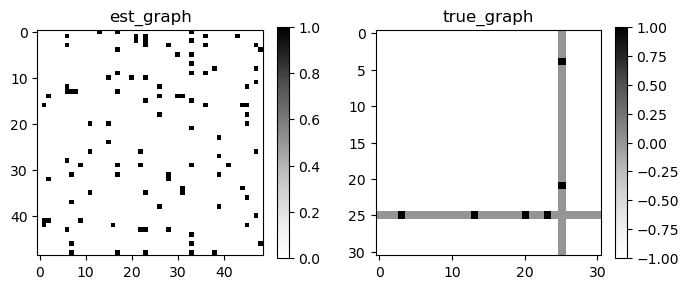

In [ ]:
GraphDAG(
    est_dag=nt_estimated, 
    true_dag=causal_prior
    )

plt.show()

In [82]:
### Add prior knowledge


In [238]:
nt.learn(samples, prior_knowledge=prior_knowledge)

2023-09-17 17:12:27,799 - /Users/zhitaogao/opt/anaconda3/envs/causal/lib/python3.9/site-packages/castle/algorithms/gradient/notears/linear.py[line:195] - INFO: [start]: n=605, d=39, iter_=100, h_=1e-08, rho_=1e+16
2023-09-17 17:12:29,217 - /Users/zhitaogao/opt/anaconda3/envs/causal/lib/python3.9/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 0] h=4.099e-01, loss=593.583, rho=1.0e+00
2023-09-17 17:12:29,565 - /Users/zhitaogao/opt/anaconda3/envs/causal/lib/python3.9/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=3.754e-01, loss=150.381, rho=1.0e+00
2023-09-17 17:12:30,068 - /Users/zhitaogao/opt/anaconda3/envs/causal/lib/python3.9/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=2.741e-01, loss=151.137, rho=1.0e+01
2023-09-17 17:12:30,823 - /Users/zhitaogao/opt/anaconda3/envs/causal/lib/python3.9/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [i

KeyboardInterrupt: 

In [89]:
nt_estimated_with_prior = nt.causal_matrix

# PC

In [275]:
pc = PC()

pc.learn(samples)



In [276]:
pc_estimated = pc.causal_matrix

In [280]:

pc_with_prior = PC(priori_knowledge=prior_knowledge)

pc_with_prior.learn(samples)

In [ ]:

pc_estimated_with_prior = pc_with_prior.causal_matrix

# Evaluation

In [95]:
est1 = nt_estimated
est2 = nt_estimated_with_prior
est3 = pc_estimated
est4 = pc_estimated_with_prior

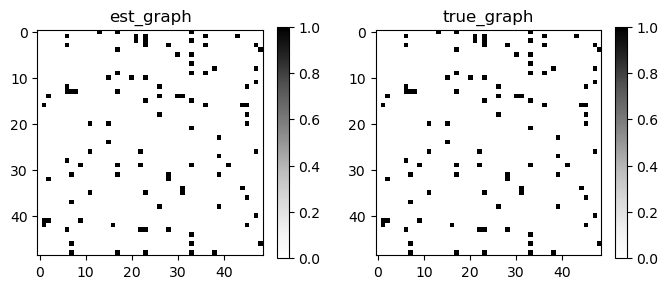

In [96]:
GraphDAG(est1, est2)

In [242]:
GraphDAG(est3, est4)

In [163]:
pc_metrics = MetricsDAG(nt_estimated, nt_estimated_with_prior)
print(f"The performance for PC with Prior Knowledge: \n{pc_metrics.metrics}")

The performance for PC with Prior Knowledge: 
{'fdr': 0.0, 'tpr': 1.0, 'fpr': 0.0, 'shd': 0, 'nnz': 100, 'precision': 1.0, 'recall': 1.0, 'F1': 1.0, 'gscore': 1.0}


In [164]:
pc_metrics = MetricsDAG(pc_estimated, pc_estimated_with_prior)
print(f"The performance for PC with Prior Knowledge: \n{pc_metrics.metrics}")

The performance for PC with Prior Knowledge: 
{'fdr': 0.0909, 'tpr': 0.9153, 'fpr': 0.0123, 'shd': 7, 'nnz': 55, 'precision': 0.9123, 'recall': 0.8814, 'F1': 0.8966, 'gscore': 0.7966}


# Save results

In [281]:
from toolkit import *
import toolkit
import importlib
importlib.reload(toolkit)

<module 'toolkit' from '/Users/zhitaogao/Library/CloudStorage/OneDrive-Personal/80_DataProjects/causality-mfg/NeurIPS2023/toolkit.py'>

In [282]:
toolkit.save_result(pc_estimated, dataset='dataset_3')

shape:  (31, 31)
Saved solution 1 for dataset dataset_3 to ./submission/solution1/dataset_3_graph_matrix.npy


In [201]:
# graph_matrix = np.array(nt_estimated)
# graph_matrix.shape

# np.save(r'./submission/dataset_1_graph_matrix.npy',graph_matrix)

In [243]:
toolkit.save_result(pc_estimated_with_prior, dataset='dataset_1')

Saved solution 1 for dataset dataset_1 to ./submission/solution1/dataset_1_graph_matrix.npy
